<div style="text-align:center">

### **FOOD DEMAND PROJECT** [🔗](https://datahack.analyticsvidhya.com/contest/genpact-machine-learning-hackathon-1/#ProblemStatement)

</div>

<div style="text-align:center">
    <img src="images/encabezado.jpg" alt="Encabezado" width="450"/>
</div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
Train= pd.read_csv('../Data/train.csv')
center_info= pd.read_csv('../Data/fulfilment_center_info.csv')
meal_info= pd.read_csv('../Data/meal_info.csv')

In [4]:
print("Dataframe 1" ,Train.shape)
print("Dataframe 2" ,center_info.shape)
print("Dataframe 3" ,meal_info.shape)

Dataframe 1 (456548, 9)
Dataframe 2 (77, 5)
Dataframe 3 (51, 3)


In [5]:
print (Train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB
None


In [6]:
Train.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [7]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [8]:
center_info.head(5)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [9]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [10]:
meal_info.head(5)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [11]:
test_data= pd.read_csv('test_QoiMO9B.csv')
test_data.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


### Merge

In [12]:
# funtion to merge any dataframe with center_info and meal_info

def merge_data(df):
    df = pd.merge(df, center_info, on='center_id')
    data = pd.merge(df, meal_info, on='meal_id')
    return data

In [13]:
data= merge_data(Train)
print(data.shape)
data.head(3)

(456548, 15)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai


In [14]:
data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [15]:
data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


### EDA

In [16]:
# Move target variable to the end of the dataframe

data = data[[c for c in data if c not in ['num_orders']] + ['num_orders']]


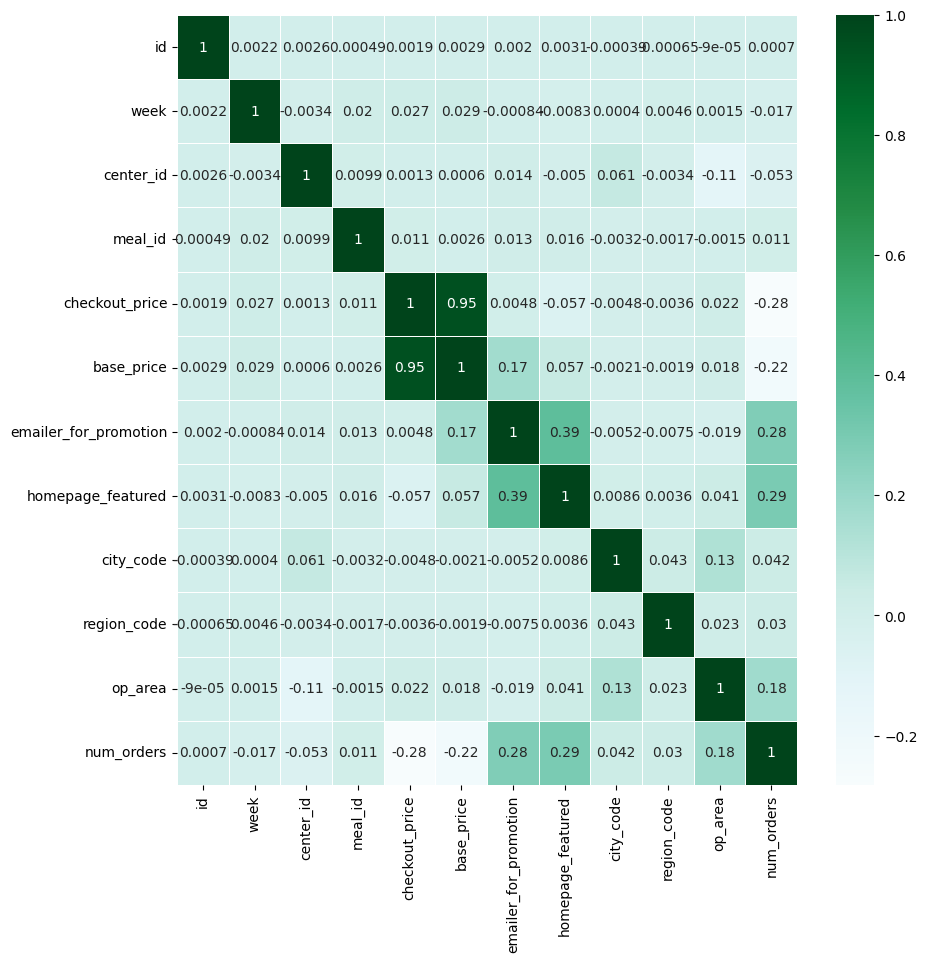

In [17]:
# Heat map to check the correlation between numeric variables 

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='BuGn', linewidths=0.5)
plt.show()


In [18]:
# Errase base_price column as it is highly correlated with checkout_price and less correlated with num_orders

data.drop('base_price', axis=1, inplace=True)

In [19]:
#Unique values in categorical columns

category_columns = data.select_dtypes(include=['object']).columns

for i in category_columns:
    print(i, data[i].nunique())

print("\n")

for i in category_columns:
    print(i, data[i].unique())

center_type 3
category 14
cuisine 4


center_type ['TYPE_C' 'TYPE_B' 'TYPE_A']
category ['Beverages' 'Rice Bowl' 'Starters' 'Pasta' 'Sandwich' 'Biryani' 'Extras'
 'Pizza' 'Seafood' 'Other Snacks' 'Desert' 'Soup' 'Salad' 'Fish']
cuisine ['Thai' 'Indian' 'Italian' 'Continental']


In [20]:
print("Center_id nuniques: ", data.center_id.nunique())
print("Meal_id nuniques: ", data.meal_id.nunique())
print("City_code nuniques: ", data.city_code.nunique())
print("Region_code nuniques: ", data.region_code.nunique())



Center_id nuniques:  77
Meal_id nuniques:  51
City_code nuniques:  51
Region_code nuniques:  8


In [21]:
data.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine',
       'num_orders'],
      dtype='object')

In [22]:
# map city_code to city
city_pedidos={590:'High', 526:'Regular', 638:'Normal'}
data['demanda'] = data['city_code'].map(city_pedidos)
data['demanda']= data['demanda'].fillna('low')

In [23]:
data.demanda.value_counts()

demanda
low        338230
High        54746
Regular     43525
Normal      20047
Name: count, dtype: int64

In [24]:
data.sample(10)

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,num_orders,demanda
39757,1499686,14,132,1803,160.05,0,0,522,56,TYPE_A,3.9,Extras,Thai,136,low
94995,1093573,33,17,1878,281.33,0,0,517,56,TYPE_A,3.2,Starters,Thai,109,low
167859,1470125,57,109,1558,678.03,0,1,599,56,TYPE_A,3.6,Pizza,Continental,177,low
377537,1161994,121,86,2577,292.03,0,0,699,85,TYPE_C,4.0,Starters,Thai,15,low
95518,1320643,33,72,1445,485.03,1,0,638,56,TYPE_C,3.9,Seafood,Continental,53,Normal
25902,1081667,10,13,1778,161.08,0,0,590,56,TYPE_B,6.7,Beverages,Italian,1122,High
138547,1245766,47,76,1993,138.71,0,0,614,85,TYPE_A,3.0,Beverages,Thai,257,low
4572,1037668,2,73,2581,581.03,1,1,576,34,TYPE_A,4.0,Pizza,Continental,94,low
208827,1198400,70,83,1230,315.25,0,0,659,77,TYPE_A,5.3,Beverages,Continental,324,low
29936,1146797,11,14,1778,161.02,0,0,654,56,TYPE_C,2.7,Beverages,Italian,445,low


In [25]:
data.demanda.value_counts()

demanda
low        338230
High        54746
Regular     43525
Normal      20047
Name: count, dtype: int64

In [26]:
data["week_number"]= data["week"]

In [27]:
# encode week beetwen 1-52
data['week'] = ((data['week'] - 1) % 52) + 1

In [28]:
data.tail(2)

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,num_orders,demanda,week_number
456546,1147725,41,61,2569,243.50,0,0,473,77,TYPE_A,4.5,Salad,Italian,729,low,145
456547,1361984,41,61,2490,292.03,0,0,473,77,TYPE_A,4.5,Salad,Italian,162,low,145


In [29]:
data['center_id']=data['center_id'].astype('object')
data['meal_id']=data['meal_id'].astype('object')
data['region_code']=data['region_code'].astype('object')

In [30]:
data.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine',
       'num_orders', 'demanda', 'week_number'],
      dtype='object')

In [31]:
obj=data[['center_id','meal_id','region_code','center_type','category','cuisine','demanda']]
numeric_data= data.drop(['center_id','meal_id','region_code','center_type','category','cuisine','demanda'], axis=1)

In [32]:
# get dummies of category 
dummies_codes= pd.get_dummies(obj, drop_first=True, dtype=int)

In [33]:
# merge dummies with numeric data
data= pd.concat([numeric_data, dummies_codes], axis=1)

In [34]:
data.tail(2)

,id,week,checkout_price,emailer_for_promotion,homepage_featured,city_code,op_area,num_orders,week_number,center_id_11,...,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,demanda_Normal,demanda_Regular,demanda_low
456546,1147725,41,243.50,0,0,473,4.5,729,145,0,...,0,0,0,0,0,1,0,0,0,1
456547,1361984,41,292.03,0,0,473,4.5,162,145,0,...,0,0,0,0,0,1,0,0,0,1


In [35]:
# Spliting data by the last 10 weeks
data_train = data[data['week_number'].isin(range(1, 136))]
data_test = data[data['week_number'].isin(range(136, 146))]
print(data_train.shape)
print(data_test.shape)

(423727, 163)
(32821, 163)


In [36]:
X_train = data_train.drop(['num_orders', "id", "week_number", "city_code"], axis=1)
y_train = data_train['num_orders']
X_test = data_test.drop(['num_orders', "id", "week_number", "city_code"], axis=1)
y_test = data_test['num_orders']


In [39]:
X_train.head(2)

,week,checkout_price,emailer_for_promotion,homepage_featured,op_area,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,...,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,demanda_Normal,demanda_Regular,demanda_low
0,1,136.83,0,0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,136.83,0,0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [43]:
to_scale = data[['checkout_price', "week"]]

In [44]:
# Standard scaling and log transformation on target variable
from sklearn.preprocessing import StandardScaler

In [45]:
sc= StandardScaler()

scal= pd.DataFrame(sc.fit_transform(to_scale), columns=to_scale.columns)

#Train
X_train[['checkout_price', "week"]]= scal
y_train= np.log1p(y_train)

#Test
X_test[['checkout_price', "week"]]= sc.transform(X_test[['checkout_price', "week"]])
y_test= np.log1p(y_test)


In [46]:
#CatBoostRegressor

from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error


In [48]:
cb=CatBoostRegressor(
    iterations=1700, 
    learning_rate=0.036, 
    max_depth=12, 
    l2_leaf_reg=10,
    loss_function='RMSE',
    random_seed=2000,
    od_type='Iter',
    od_wait=25,
    verbose=100,
    subsample=0.25
    
    )

cb.fit(X_train,y_train)

print('Train Score :',cb.score(X_train,y_train))
print('Test Score :',cb.score(X_test,y_test))

y_pred = cb.predict(X_test)
print('R squared :',(r2_score(y_test,y_pred)))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('rmsle: ', mean_squared_log_error(y_test,y_pred) ) 

0:	learn: 1.1797039	total: 75.6ms	remaining: 2m 8s
100:	learn: 0.6115506	total: 7.38s	remaining: 1m 56s
200:	learn: 0.5642739	total: 14.5s	remaining: 1m 47s
300:	learn: 0.5410950	total: 21.7s	remaining: 1m 40s
400:	learn: 0.5257717	total: 28.9s	remaining: 1m 33s
500:	learn: 0.5142460	total: 35.9s	remaining: 1m 25s
600:	learn: 0.5055099	total: 43.2s	remaining: 1m 18s
700:	learn: 0.4985871	total: 50.5s	remaining: 1m 11s
800:	learn: 0.4928324	total: 58.3s	remaining: 1m 5s
900:	learn: 0.4880343	total: 1m 6s	remaining: 58.8s
1000:	learn: 0.4840256	total: 1m 13s	remaining: 51.4s
1100:	learn: 0.4802747	total: 1m 21s	remaining: 44.1s
1200:	learn: 0.4770339	total: 1m 28s	remaining: 36.8s
1300:	learn: 0.4741617	total: 1m 36s	remaining: 29.5s
1400:	learn: 0.4714784	total: 1m 43s	remaining: 22.2s
1500:	learn: 0.4689737	total: 1m 51s	remaining: 14.8s
1600:	learn: 0.4665459	total: 1m 59s	remaining: 7.36s
1699:	learn: 0.4644395	total: 2m 6s	remaining: 0us
Train Score : 0.8519691063765208
Test Score :

checkout_price: 15.39846857167284
category_Rice Bowl: 14.544894068674465
cuisine_Indian: 9.355683481540694
op_area: 6.877000813612977
cuisine_Italian: 6.8010247761543035
category_Pasta: 4.460230891141828
homepage_featured: 3.215091450490787
center_type_TYPE_C: 2.8897921676408957
emailer_for_promotion: 2.859817822978941
region_code_56: 2.553336702226831
cuisine_Thai: 2.2243252678769228
week: 2.1837632066007107
category_Soup: 2.1483359399110884
center_type_TYPE_B: 1.7076310951366096
category_Pizza: 1.5655750080235182
demanda_low: 1.3475831606900497
meal_id_1885: 1.1786184951808754
category_Biryani: 0.8638818383723389
region_code_34: 0.8547429900430075
region_code_85: 0.7952783508056219
category_Other Snacks: 0.7706193813234214
meal_id_1993: 0.7128382810017252
meal_id_1962: 0.6476012556777292
category_Seafood: 0.6029715736932271
category_Starters: 0.5835093410203027
meal_id_2290: 0.47462807265663615
region_code_77: 0.4688230308625883
meal_id_1778: 0.42666625822287507
category_Sandwich: 0.

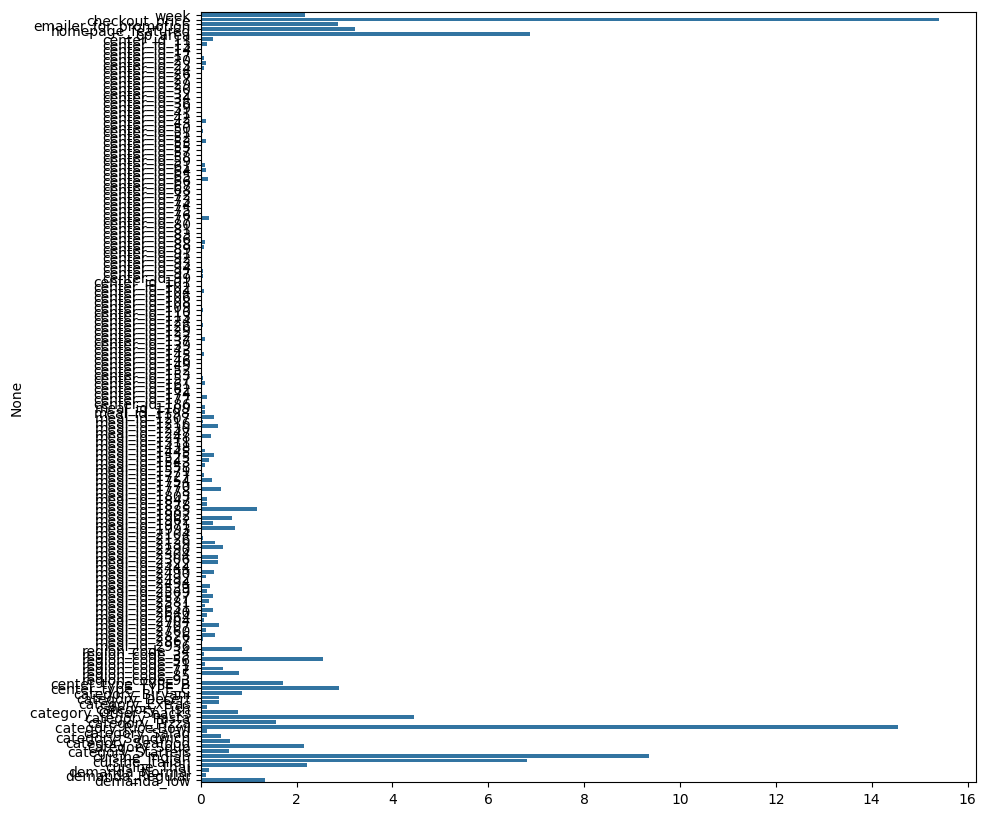

In [52]:
# Feature importance (Top 20)
feature_importances = cb.get_feature_importance()
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

# Plotting 20 more important features 
plt.figure(figsize=(10,10))
sns.barplot(x=feature_importances, y=feature_names)
plt.show()

#save model
import pickle
filename = 'finalized_model_CATBOOST.sav'
pickle.dump(cb, open(filename, 'wb'))

#Save feature importance on a csv file
feature_importance = pd.DataFrame(feature_importances, index=feature_names, columns=['importance'])
feature_importance.to_csv('feature_importance_CATBOOST.csv')


In [55]:
#MODEL WITH ALL DATA

X = data.drop(['num_orders', "id", "week_number", "city_code"], axis=1)
y = data['num_orders']

X[['checkout_price', "week"]]= sc.transform(X[['checkout_price', "week"]])
y= np.log1p(y)

cb.fit(X,y)

0:	learn: 1.1760526	total: 97ms	remaining: 2m 44s
100:	learn: 0.6107475	total: 7.78s	remaining: 2m 3s
200:	learn: 0.5644112	total: 15.3s	remaining: 1m 54s
300:	learn: 0.5415300	total: 23.4s	remaining: 1m 48s
400:	learn: 0.5258244	total: 31.5s	remaining: 1m 41s
500:	learn: 0.5144481	total: 41.2s	remaining: 1m 38s
600:	learn: 0.5055671	total: 48.6s	remaining: 1m 28s
700:	learn: 0.4990957	total: 55.9s	remaining: 1m 19s
800:	learn: 0.4936011	total: 1m 3s	remaining: 1m 11s
900:	learn: 0.4888524	total: 1m 10s	remaining: 1m 2s
1000:	learn: 0.4847611	total: 1m 18s	remaining: 55s
1100:	learn: 0.4812809	total: 1m 26s	remaining: 47.2s
1200:	learn: 0.4781285	total: 1m 34s	remaining: 39.3s
1300:	learn: 0.4753169	total: 1m 42s	remaining: 31.5s
1400:	learn: 0.4726923	total: 1m 49s	remaining: 23.5s
1500:	learn: 0.4704053	total: 1m 57s	remaining: 15.6s
1600:	learn: 0.4682330	total: 2m 4s	remaining: 7.71s
1699:	learn: 0.4661967	total: 2m 12s	remaining: 0us


In [56]:
# predict test data
test_data= merge_data(test_data)
test_data['demanda'] = test_data['city_code'].map(city_pedidos)
test_data['demanda']= test_data['demanda'].fillna('low')
test_data['week'] = ((test_data['week'] - 1) % 52) + 1
test_data['center_id']=test_data['center_id'].astype('object')
test_data['meal_id']=test_data['meal_id'].astype('object')
test_data['region_code']=test_data['region_code'].astype('object')
obj=test_data[['center_id','meal_id','region_code','center_type','category','cuisine','demanda']]
numeric_data= test_data.drop(['center_id','meal_id','region_code','center_type','category','cuisine','demanda'], axis=1)
dummies_codes= pd.get_dummies(obj, drop_first=True, dtype=int)
test_data= pd.concat([numeric_data, dummies_codes], axis=1)
test_data[['checkout_price', "week"]]= sc.transform(test_data[['checkout_price', "week"]])

In [57]:
y_pred = cb.predict(test_data.drop(['id', 'city_code'], axis=1))

In [58]:
y_pred = np.expm1(y_pred)

In [59]:
# Save predictions to a file
submission = pd.DataFrame({'id':test_data['id'],'num_orders':y_pred})
submission.to_csv('submission_CATBOOST.csv',index=False)

In [60]:
submission.min(), submission.max()

(id            1.000085e+06
 num_orders    9.393728e+00
 dtype: float64,
 id            1.499996e+06
 num_orders    6.568920e+03
 dtype: float64)

In [64]:
# 51.7835489097 SCORE